In [1]:
#!flask/bin/python
import os
import json

import numpy as np

from scipy import signal
from scipy.stats import describe

from matplotlib import pyplot as plt
from crawlab_toolbox import plotting as genplt


In [6]:

def parse_vibration(filename,fftPoints=None,samplingInterval=None,returnVib=False):
    
    fftPoints = int(filename)
    samplingInterval = 1 / fftPoints

    f = open('data/Arduino-Freq-Tests/' + filename,'rb')

    raw_data = f.read()

    data = np.frombuffer(raw_data,dtype=np.uint16).astype(float) / 4096 * 1.8

    _,minmax,mean,variance,skewness,kurtosis = describe(data)
    if fftPoints != None and samplingInterval != None:
        freqs,amps = signal.welch(data, fs=1 / samplingInterval, nperseg=fftPoints, scaling='spectrum')
        frequencyInterval = freqs[1] - freqs[0]
    else:
        freqs = np.array([])
        amps = np.array([])
        frequencyInterval = 0.

    sampleRMS = np.sqrt(1 / data.shape[0] * np.sum((data - mean)**2))

    output = {'frequencyInterval':frequencyInterval,
              'fftAmps':amps[1:].tolist(),
              'Vibration':data.tolist(),
              'Freqs':freqs.tolist(),
              'RMS':sampleRMS,
              'Kurtosis':kurtosis,
              'Mean':mean,
              'Skewness':skewness,
              'Variance':variance}

    return output


In [59]:
samplingRates = ['2048','4096','8192','16384','32768']
index = 0
result = parse_vibration(samplingRates[index])


In [60]:
Vibration = np.array(result['Vibration'])
psd = np.array(result['fftAmps'])
freqs = np.array(result['Freqs'])
rms = result['RMS']

In [57]:
for i in range(len(samplingRates)):
    result = parse_vibration(samplingRates[i])
    Vibration = np.array(result['Vibration'])
    psd = np.array(result['fftAmps'])
    freqs = np.array(result['Freqs'])
    rms = result['RMS']  
    
    
    print(np.amax(Vibration),np.amax(psd),10 * np.log10(np.amax(psd)/ np.mean(psd)))

1.6382812500000001 0.3260330081857416 28.33975194999757
1.6448730468750001 0.32570114397595806 31.34969551236093
1.6448730468750001 0.3251558098784932 34.359974581379774
1.643994140625 0.32447697945036197 37.36995404443347
1.6505859375 0.3235650408655755 40.37666992029528


2048.0


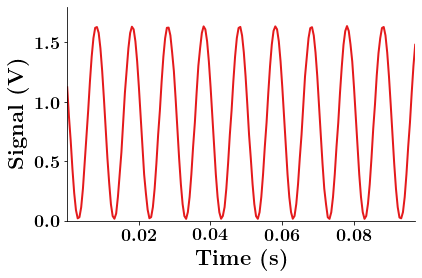

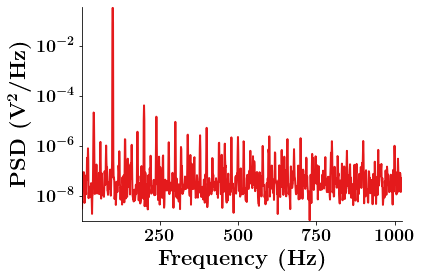

In [62]:
samplingInterval = 1/int(samplingRates[index])
print(1/samplingInterval)
time = np.arange(0,2,samplingInterval)
freqs = np.arange(1,psd.shape[0]+1)
# time = np.arange(0,vibration.shape[0])

# combine the responses and labels to put on our 2D plot
responses = np.vstack((Vibration))
labels = [r'']


# Create a 2D plot
genplt.generate_plot(time[:200], # X - coordinate on the plot
              responses[:200],# Y - coordinates on the plot
              labels,# Labels for the plot legend
              'Time (s)',# X - axis label
              'Signal (V)',   # Y - axis label
              filename='signal_PRU',   # Plot filename
              folder='figures',    # Specify the folder where the filename will be saved
              num_col=2,    # Specify the number of columns in the legend
              legend_loc='best', # Specify the location of the legend
              ymax=0.1,
                     ymin=0.05,
              transparent=True,
              showplot=True,
              save_plot=True,
              template='publication',
              file_type='png'
             )

labels = [r'']


# Create a 2D plot
genplt.generate_plot(freqs, # X - coordinate on the plot
              psd,# Y - coordinates on the plot
              labels,# Labels for the plot legend
              'Frequency (Hz)',# X - axis label
              r'PSD $(\mathrm{V}^2/\mathrm{Hz})$',   # Y - axis label
              filename='FFT_PRU',   # Plot filename
              folder='figures',    # Specify the folder where the filename will be saved
              num_col=2,    # Specify the number of columns in the legend
              legend_loc='best', # Specify the location of the legend
              ymax=0.1,
                     ymin=0.05,
              transparent=True,
              log_y=True,
              showplot=True,
              save_plot=True,
              template='publication',
              file_type='png'
             )